# 🧠 Crypto Market Prediction — EDA
This notebook performs an exploratory data analysis (EDA) of the dataset from the DRW Crypto Market Prediction competition.  
We aim to understand the structure, key signals, and statistical properties of the data.

---

🗂 **Files used:**
- `train.parquet`: Minute-level data from March 1, 2023, to Feb 29, 2024.
- `test.parquet`: Data with masked timestamps (no labels).
- `sample_submission.csv`: Format of final predictions.

📈 **Goal:**
Investigate market-related and anonymized features to prepare for feature engineering and modeling.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objs as go

In [5]:
train = pd.read_parquet("data/train.parquet")
test = pd.read_parquet("data/test.parquet")
sample_submission = pd.read_csv("data/sample_submission.csv")

In [6]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (525886, 786)
Test shape: (538150, 786)


In [7]:
train.head()

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X772,X773,X774,X775,X776,X777,X778,X779,X780,label
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.181844,-0.637860,0.006652,0.136870,0.116698,...,0.333753,-0.009992,-0.695595,-0.444077,-0.191238,-0.184251,-0.471897,-0.625428,-0.553991,0.562539
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.489497,-0.075619,0.431594,0.522400,0.475255,...,0.333657,-0.010040,-0.696226,-0.452866,-0.200082,-0.188929,-0.472842,-0.625832,-0.554426,0.533686
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.260121,-0.444684,0.100695,0.224729,0.203282,...,0.333667,-0.010037,-0.696832,-0.461383,-0.208786,-0.193571,-0.473785,-0.626236,-0.554860,0.546505
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.099976,-0.666728,-0.123858,0.019197,0.014459,...,0.333174,-0.010279,-0.697391,-0.469628,-0.217350,-0.198175,-0.474726,-0.626639,-0.555294,0.357703
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.270893,-0.325973,0.116336,0.234311,0.214073,...,0.333171,-0.010283,-0.697940,-0.477622,-0.225780,-0.202745,-0.475666,-0.627043,-0.555728,0.362452


In [13]:
train.columns.tolist()

['bid_qty',
 'ask_qty',
 'buy_qty',
 'sell_qty',
 'volume',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X72',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X1

In [14]:
train.index

DatetimeIndex(['2023-03-01 00:00:00', '2023-03-01 00:01:00',
               '2023-03-01 00:02:00', '2023-03-01 00:03:00',
               '2023-03-01 00:04:00', '2023-03-01 00:05:00',
               '2023-03-01 00:06:00', '2023-03-01 00:07:00',
               '2023-03-01 00:08:00', '2023-03-01 00:09:00',
               ...
               '2024-02-29 23:50:00', '2024-02-29 23:51:00',
               '2024-02-29 23:52:00', '2024-02-29 23:53:00',
               '2024-02-29 23:54:00', '2024-02-29 23:55:00',
               '2024-02-29 23:56:00', '2024-02-29 23:57:00',
               '2024-02-29 23:58:00', '2024-02-29 23:59:00'],
              dtype='datetime64[ns]', length=525886, freq=None)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525886 entries, 2023-03-01 00:00:00 to 2024-02-29 23:59:00
Columns: 786 entries, bid_qty to label
dtypes: float64(786)
memory usage: 3.1 GB


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bid_qty,525886.0,9.967948,15.645712,0.001000,2.634000,6.415000,13.085000,1114.932000
ask_qty,525886.0,10.174161,15.889598,0.001000,2.678000,6.538000,13.330000,1352.965000
buy_qty,525886.0,131.712690,307.184897,0.000000,26.407000,57.015000,127.626000,17609.567000
sell_qty,525886.0,132.660088,309.728730,0.000000,27.020250,58.044500,129.100500,17685.503000
volume,525886.0,264.372778,588.457585,0.000000,60.687000,120.790500,256.730750,28685.346000
...,...,...,...,...,...,...,...,...
X777,525886.0,-0.003692,1.001483,-0.751271,-0.749811,-0.692477,1.321203,1.627729
X778,525886.0,-0.003864,1.002343,-0.807807,-0.760165,-0.605916,1.010719,1.765409
X779,525886.0,-0.004136,1.003870,-0.889107,-0.794947,-0.620694,0.918046,1.944191
X780,525886.0,-0.004453,1.005657,-1.071562,-0.892474,-0.431237,0.830857,2.093401


### Shows missing values and duplicates

In [10]:
train.isnull().sum().sort_values(ascending=False).head()

label      0
bid_qty    0
X765       0
X764       0
X763       0
dtype: int64

In [11]:
train.duplicated().sum()

np.int64(0)

In [16]:
train.index = pd.to_datetime(train.index)
train = train.sort_index()

### Time range of the dataset

In [17]:
train.index.min(), train.index.max()

(Timestamp('2023-03-01 00:00:00'), Timestamp('2024-02-29 23:59:00'))

####  Target Variable — label

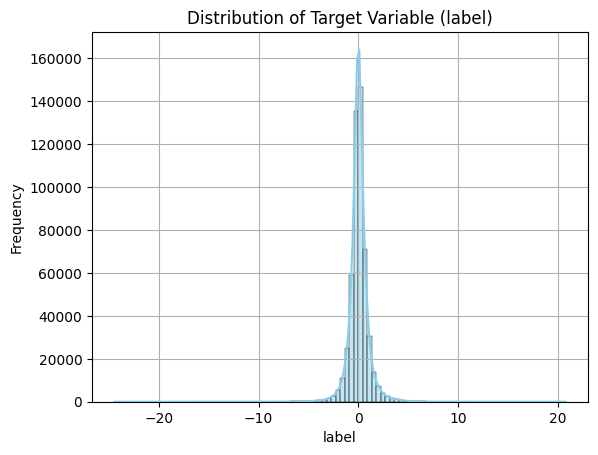

Mean: 0.03612583479917426
Std: 1.0099145156502878


In [19]:
sns.histplot(train['label'], kde=True, bins=100, color="skyblue")
plt.title("Distribution of Target Variable (label)")
plt.xlabel("label")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Mean:", train['label'].mean())
print("Std:", train['label'].std())

### Market Activity Over Time

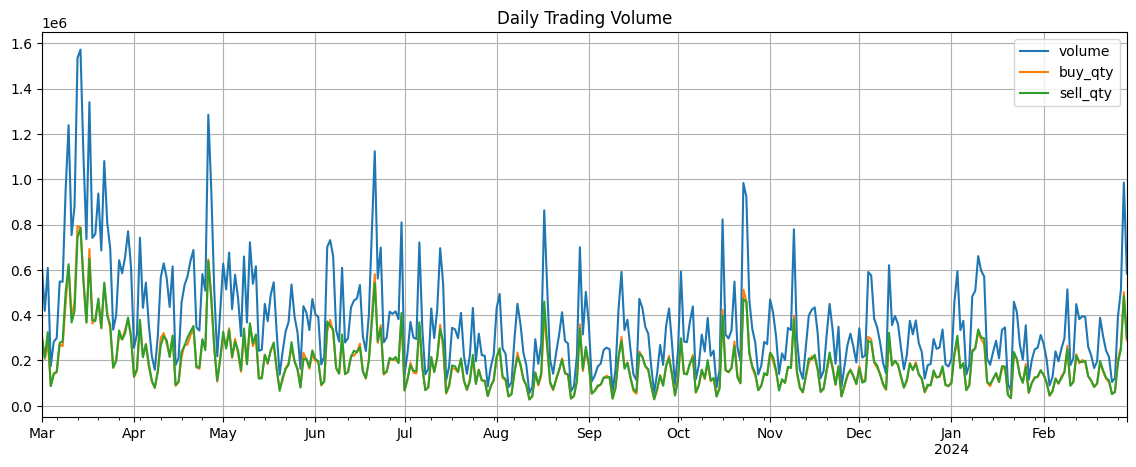

In [33]:
# Daily aggregated activity
train[['volume', 'buy_qty', 'sell_qty']].resample('D').sum().plot(figsize=(14,5), title="Daily Trading Volume")
plt.grid(True)
plt.show()

## Feature Engineering — Derived Signals

In [21]:
train['buy_pressure'] = train['buy_qty'] / (train['buy_qty'] + train['sell_qty'] + 1e-5)
train['bid_ask_ratio'] = train['bid_qty'] / (train['bid_qty'] + train['ask_qty'] + 1e-5)

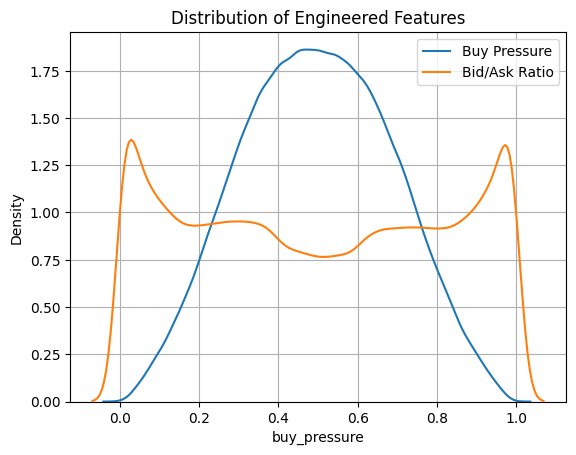

In [32]:
sns.kdeplot(train['buy_pressure'], label='Buy Pressure')
sns.kdeplot(train['bid_ask_ratio'], label='Bid/Ask Ratio')
plt.title("Distribution of Engineered Features")
plt.legend()
plt.grid(True)
plt.show()

## High-Dimensional Features — X_1 to X_780

In [23]:
feature_cols = [col for col in train.columns if col.startswith("X_")]
print("Number of proprietary features:", len(feature_cols))

Number of proprietary features: 0


## Correlation with label

In [24]:
correlations = train[feature_cols + ['label']].corr()['label'].sort_values(key=abs, ascending=False)
correlations.head(10)

label    1.0
Name: label, dtype: float64

### Visualizing top 5 features vs label

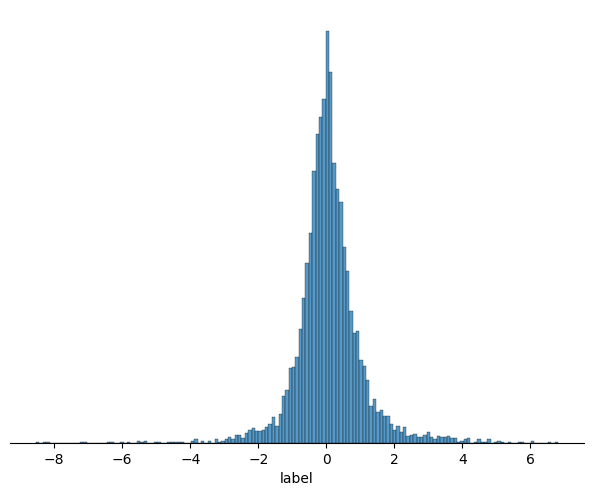

In [31]:
top_features = correlations.index[1:6]  # Skip 'label' itself
sns.pairplot(train[top_features.tolist() + ['label']].sample(5000), corner=True, height=5, aspect=1.2)
plt.show()

### Key Insights:

- The target variable `label` is roughly normally distributed with heavy tails.
- Engineered features like `buy_pressure` and `bid_ask_ratio` show clear signal potential.
- The dataset contains 780 anonymized features — some show weak but non-random correlation with the target.
- No missing values or duplicates detected.
- Data is clean, indexed by timestamp, and sorted chronologically.

➡ Next step: design and train predictive models using this data structure.